In [396]:
%matplotlib inline

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.multivariate.pca import PCA
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
#Tutorial Base
#https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html
#https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html
#https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_arma_0.html
#https://medium.com/@gisely.alves/s%C3%A9ries-temporais-parte-1-20fca5a6c7cd

In [397]:
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [398]:
dados = pd.read_csv(r"C:\previsao_precos\Superstore.csv",sep=";")





In [399]:
dados.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [400]:
dados = dados[['Order ID','Order Date','Country','City'
       ,'Category','Sales','Quantity','Discount']]

In [401]:
dados

,Order ID,Order Date,Country,City,Category,Sales,Quantity,Discount
0,CA-2016-152156,08/11/2016,United States,Henderson,Furniture,"261,96",2,0
1,CA-2016-152156,08/11/2016,United States,Henderson,Furniture,"731,94",3,0
2,CA-2016-138688,12/06/2016,United States,Los Angeles,Office Supplies,"14,62",2,0
3,US-2015-108966,11/10/2015,United States,Fort Lauderdale,Furniture,"957,5775",5,"0,45"
4,US-2015-108966,11/10/2015,United States,Fort Lauderdale,Office Supplies,"22,368",2,"0,2"
...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,21/01/2014,United States,Miami,Furniture,"25,248",3,"0,2"
9990,CA-2017-121258,26/02/2017,United States,Costa Mesa,Furniture,"91,96",2,0
9991,CA-2017-121258,26/02/2017,United States,Costa Mesa,Technology,"258,576",2,"0,2"
9992,CA-2017-121258,26/02/2017,United States,Costa Mesa,Office Supplies,"29,6",4,0


In [402]:
dados['Order Date'] = pd.to_datetime(dados['Order Date'],errors='coerce')

In [403]:
dados.dropna(subset=['Order Date'],inplace=True)

In [404]:
dados[['Sales','Discount']] = dados[['Sales','Discount']].applymap(lambda k: k.replace(".","").replace(",","."))

In [405]:
dados['Quantity'] = dados['Quantity'].astype(int)

In [406]:
dados[['Sales','Discount']] = dados[['Sales','Discount']].astype(float).round(2)

In [407]:
data = dados[['Sales','Discount','Category','Country','City','Quantity','Order Date']]

In [408]:
data.head(2)

,Sales,Discount,Category,Country,City,Quantity,Order Date
0,261.96,0.0,Furniture,United States,Henderson,2,2016-08-11
1,731.94,0.0,Furniture,United States,Henderson,3,2016-08-11


In [409]:

data.set_index("Order Date", inplace=True)
#dta = dados[columns]
data.head(2)


,Sales,Discount,Category,Country,City,Quantity
Order Date,,,,,,
2016-08-11,261.96,0.0,Furniture,United States,Henderson,2
2016-08-11,731.94,0.0,Furniture,United States,Henderson,3


In [410]:
data.columns

Index(['Sales', 'Discount', 'Category', 'Country', 'City', 'Quantity'], dtype='object')

In [411]:
data

,Sales,Discount,Category,Country,City,Quantity
Order Date,,,,,,
2016-08-11,261.96,0.00,Furniture,United States,Henderson,2
2016-08-11,731.94,0.00,Furniture,United States,Henderson,3
2016-12-06,14.62,0.00,Office Supplies,United States,Los Angeles,2
2015-11-10,957.58,0.45,Furniture,United States,Fort Lauderdale,5
2015-11-10,22.37,0.20,Office Supplies,United States,Fort Lauderdale,2
...,...,...,...,...,...,...
2016-06-12,13.38,0.20,Office Supplies,United States,Los Angeles,4
2016-06-12,437.47,0.20,Office Supplies,United States,Los Angeles,14
2015-06-09,85.98,0.00,Furniture,United States,Lafayette,1


In [412]:
precos = data[['Sales','Quantity']]

In [413]:
precos

,Sales,Quantity
Order Date,,
2016-08-11,261.96,2
2016-08-11,731.94,3
2016-12-06,14.62,2
2015-11-10,957.58,5
2015-11-10,22.37,2
...,...,...
2016-06-12,13.38,4
2016-06-12,437.47,14
2015-06-09,85.98,1


<Axes: xlabel='Order Date'>

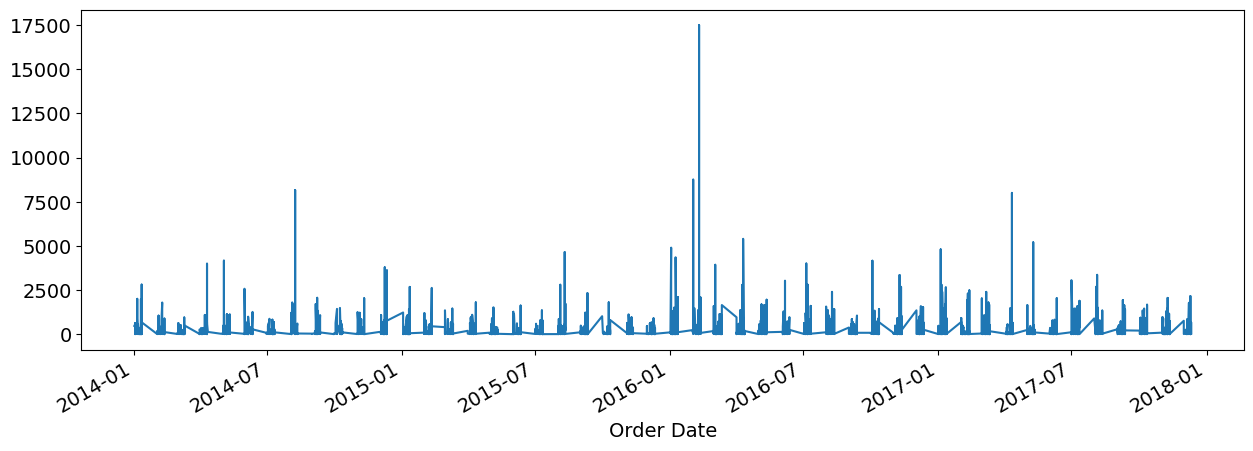

In [423]:

endog = precos['Sales']
endog.plot(figsize=(15, 5))

In [415]:
y = precos['Sales']
x = precos['Quantity']
x = sm.add_constant(x)

In [416]:
olsmod = sm.OLS(y, x)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     160.5
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           4.25e-36
Time:                        13:32:59   Log-Likelihood:                -31253.
No. Observations:                4042   AIC:                         6.251e+04
Df Residuals:                    4040   BIC:                         6.252e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9303     17.243      1.794      0.0

In [417]:
ypred = olsres.predict(x)
precos['previsao'] = ypred

In [418]:
precos

,Sales,Quantity,previsao
Order Date,,,
2016-08-11,261.96,2,131.074271
2016-08-11,731.94,3,181.146263
2016-12-06,14.62,2,131.074271
2015-11-10,957.58,5,281.290247
2015-11-10,22.37,2,131.074271
...,...,...,...
2016-06-12,13.38,4,231.218255
2016-06-12,437.47,14,731.938174
2015-06-09,85.98,1,81.002279


In [ ]:
fig, ax = plt.subplots()


In [422]:
mod = sm.tsa.SARIMAX(endog)
res = mod.fit()

print(res.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 4042
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -31582.135
Date:                Wed, 26 Apr 2023   AIC                          63168.270
Time:                        13:33:16   BIC                          63180.879
Sample:                             0   HQIC                         63172.737
                               - 4042                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1333      0.010     12.755      0.000       0.113       0.154
sigma2      3.584e+05    757.651    472.993      0.000    3.57e+05     3.6e+05
Ljung-Box (L1) (Q):                  69.06   Jarque-